# Characterization of Discrete Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Eigenfunctions

An [eigenfunction](https://en.wikipedia.org/wiki/Eigenfunction) of a discrete system is defined as the input signal $x[k]$ which produces the output signal $y[k] = \mathcal{H}\{ x[k] \} = \lambda \cdot x[k]$ with $\lambda \in \mathbb{C}$. The weight $\lambda$ associated with $x[k]$ is known as scalar eigenvalue of the system. Hence besides a weighting factor, an eigenfunction is not modified by passing through the system.

[Complex exponential signals](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) $z^k$ with $z \in \mathbb{C}$ are eigenfunctions of discrete linear time-invariant (LTI) systems. Let's assume a generic LTI system with input signal $x[k] = z^k$ and output signal $y[k] = \mathcal{H}\{ x[k] \}$. Due to the time-invariance of the system, the response to a shifted input signal $x(k-\kappa) = z^{k - \kappa}$ reads

\begin{equation}
y[k- \kappa] = \mathcal{H}\{ x[k - \kappa] \} = \mathcal{H}\{ z^{- \kappa} \cdot z^k  \}
\end{equation}

Due to the linearity of the system this can be reformulated as

\begin{equation}
y[k- \kappa] =  z^{- \kappa} \cdot \mathcal{H}\{ z^k  \} = z^{- \kappa} \cdot y[k]
\end{equation}

If the complex exponential signal $z^k$ is an eigenfunction of the LTI system, the output 
signal is a weighted exponential signal $y[k] = \lambda \cdot z^k$. Introducing $y[k]$ into the left- and right-hand side of above equation yields

\begin{equation}
\lambda z^k z^{- \kappa} = z^{- \kappa} \lambda z^k
\end{equation}

which obviously is fulfilled. This proves that the exponential signal $z^k$ is an eigenfunction of LTI systems.

**Example**

The output signal of the previously introduced [second-order recursive LTI system](difference_equation.ipynb#Second-Order-System) with the difference equation

\begin{equation}
y[k] - y[k-1] + \frac{1}{2} y[k-2] = x[k]
\end{equation}

is computed for a complex exponential signal $x[k] = z^k$ at the input. The output signal should be a weighted complex exponential due to above reasoning.

In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

a = [1.0, -1.0, 1/2]
b = [1.0]
z = np.exp(0.02 + .5j)

k = np.arange(30)
x = z**k
y = signal.lfilter(b, a, x)

The real and imaginary part of the input and output signal is plotted.

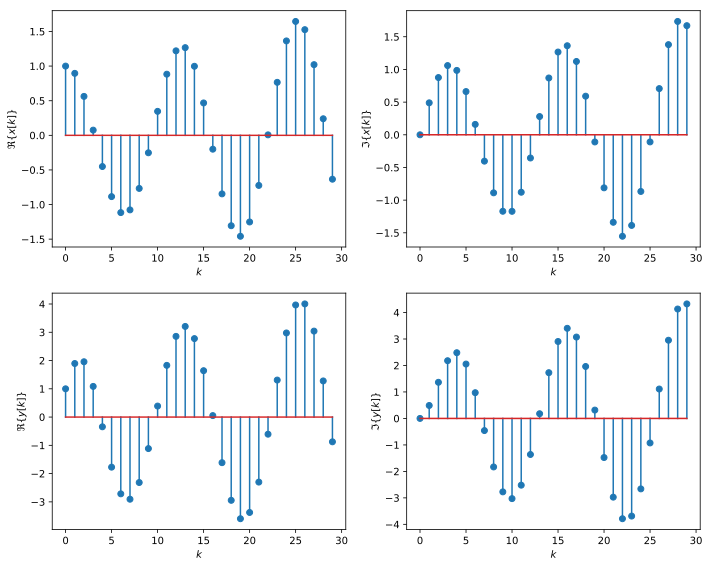

In [2]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.stem(k, np.real(x))
plt.xlabel('$k$')
plt.ylabel(r'$\Re \{ x[k] \}$')

plt.subplot(222)
plt.stem(k, np.imag(x))
plt.xlabel('$k$')
plt.ylabel(r'$\Im \{ x[k] \}$')
plt.tight_layout()

plt.subplot(223)
plt.stem(k, np.real(y))
plt.xlabel('$k$')
plt.ylabel(r'$\Re \{ y[k] \}$')

plt.subplot(224)
plt.stem(k, np.imag(y))
plt.xlabel('$k$')
plt.ylabel(r'$\Im \{ y[k] \}$')
plt.tight_layout()

**Exercise**

* From the in- and output signal only, can we conclude that the system is LTI?

## Transfer Function

The complex eigenvalue $\lambda$ characterizes the properties of the transfer of a complex exponential signal $z^k$ with [complex frequency $z$](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) through a discrete LTI system. It is commonly termed as [*transfer function*](https://en.wikipedia.org/wiki/Transfer_function) and denoted by $H(z)=\lambda(z)$. Using this definition, the output signal $y[k]$ of an LTI system with complex exponential signal at the input reads

\begin{equation}
y[k] = \mathcal{H} \{ z^k \} = H(z) \cdot z^k
\end{equation}

Note that the concept of the transfer function is directly linked to the linearity and time-invariance of a system. Only in this case, complex exponential signals are eigenfunctions of the system and $H(z)$ describes the properties of an LTI system with respect to these.

Above equation can be rewritten in terms of the magnitude $| H(z) |$ and phase $\varphi(z)$ of the complex transfer function $H(z)$

\begin{equation}
y[k] = | H(z) | \cdot z^k = | H(z) | \cdot e^{\Sigma k + j \Omega k + j \varphi(z)}
\end{equation}

where $z = e^{\Sigma + j \Omega}$ has been substituted to derive the last equality. The magnitude $| H(z) |$ provides the frequency dependent attenuation of the eigenfunction $z^k$ by the system, while $\varphi(z)$ provides the phase-shift introduced by the system.

## Link between Transfer Function and Impulse Response

In order to establish a link between the transfer function $H(z)$ and the impulse response $h[k]$, the output signal $y[k] = \mathcal{H} \{ x[k] \}$ of an LTI system with input signal $x[k]$ is computed. It is given by convolving the input signal with the impulse response

\begin{equation}
y[k] = x[k] * h[k] = \sum_{\kappa = -\infty}^{\infty} x[k-\kappa] \cdot h[\kappa]
\end{equation}

For a complex exponential signal as input $x[k] = z^k$ the output of the LTI system is given as $y[k] = \mathcal{H} \{ z^k \} = H(z) \cdot z^k$. Introducing both signals into the left- and right-hand side of the convolution yields

\begin{equation}
H(z) \cdot z^k = \sum_{\kappa = -\infty}^{\infty} z^k \, z^{- \kappa} \cdot h[\kappa]
\end{equation}

which after canceling out $z^k$ results in

\begin{equation}
H(z) = \sum_{\kappa = -\infty}^{\infty} h[\kappa] \cdot z^{- \kappa}
\end{equation}

The transfer function $H(z)$ can be computed from the impulse response by summing over the impulse response $h[k]$  multiplied with the complex exponential function $z^k$. This constitutes a transformation, which is later introduced in more detail as [$z$-transform](https://en.wikipedia.org/wiki/Z-transform).

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.